Données : http://www.data.gouv.fr/fr/datasets/indicateur-avance-sanitaire-ias-r-manifestations-allergiques/

L’IAS® Allergies permet désormais d’analyser le **niveau des pathologies allergiques en France au jour le jour**. Il est particulièrement adapté au suivi de l’évolution spatio-temporelle des allergies saisonnières. Du cyprès à partir de février jusqu’à l’ambroisie en août, vous pourrez visualiser l’évolution des pathologies allergiques à J+1 et tout au long de l’année. Cet IAS® se positionne comme complémentaire de la surveillance des pollens par le Réseau National de Surveillance Aérobiologique, qui est un système de suivi des facteurs de risques.

Le modèle utilisé pour l’IAS® Allergies est **basé sur le suivi d’un ensemble de médicaments indiqués dans le traitement symptomatique des allergies** de la France et utilise les méthodes d’analyse et de représentations développées par le projet 

Auteur: Florian Gauthier

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import gridspec

%matplotlib inline

In [2]:
allergies = pd.read_csv('../data/Openhealth_allergies.csv', sep=';', encoding='latin-1')

In [3]:
allergies_regions = pd.read_csv('../data/Openhealth_allergies_Regions.csv', sep=';')

In [4]:
allergies_regions.head(2).transpose()

,0,1
PERIODE,01-10-2016,02-10-2016
Senti,NaN,NaN
Sais_2015_2016,"97,4","97,2"
Sais_2014_2015,"97,6","97,4"
Sais_2013_2014,"97,1",97
Sais_2012_2013,"96,8","96,6"
Sais_2011_2012,"99,6","98,9"
Sais_2010_2011,"92,7","92,3"
Sais_2009_2010,NaN,NaN
Sais_2008_2009,NaN,NaN


In [5]:
allergies_regions

,PERIODE,Senti,Sais_2015_2016,Sais_2014_2015,Sais_2013_2014,Sais_2012_2013,Sais_2011_2012,Sais_2010_2011,Sais_2009_2010,Sais_2008_2009,...,Loc_Reg74,Loc_Reg82,Loc_Reg83,Loc_Reg91,Loc_Reg93,Loc_Reg94,MIN_Saison,MAX_Saison,IN_Def,IN_Temp
0,01-10-2016,NaN,"97,4","97,6","97,1","96,8","99,6","92,7",NaN,NaN,...,"101,87","103,65","100,44","99,67","96,29","100,78","92,7","99,6","99,2",NaN
1,02-10-2016,NaN,"97,2","97,4",97,"96,6","98,9","92,3",NaN,NaN,...,"101,46","103,22","100,07","99,605","96,64","100,275","92,3","98,9","98,7",NaN
2,03-10-2016,NaN,"96,9","97,2","96,8","96,7","98,3","91,9",NaN,NaN,...,"101,22","102,695","99,65","99,345","97,15","99,13","91,9","98,3","98,5",NaN
3,04-10-2016,NaN,"96,5","96,8","96,2","96,9",98,"91,6",NaN,NaN,...,"101,11","101,98","99,28","99,01","97,5","97,655","91,6",98,"98,4",NaN
4,05-10-2016,NaN,"96,2","96,4","95,5","96,9","97,7","91,5",NaN,NaN,...,"100,97","101,33","98,91","98,525","97,51","96,11","91,5","97,7","98,2",NaN
5,06-10-2016,NaN,96,"96,1","94,8","96,8","97,3","91,5",NaN,NaN,...,"100,78","100,45","98,39","97,96","97,18","94,57","91,5","97,3","97,9",NaN
6,07-10-2016,NaN,"95,7","95,8","94,2","96,7","96,7","91,5",NaN,NaN,...,"100,64","99,41","97,78","97,015","96,74","93,1","91,5","96,7","97,5",NaN
7,08-10-2016,NaN,"95,2","95,5","93,7","96,7",96,"91,5",NaN,NaN,...,"100,45","98,51","97,19","95,965","96,18","91,825","91,5","96,7",97,NaN
8,09-10-2016,NaN,"94,6","95,3","93,4","96,7","95,4","91,6",NaN,NaN,...,"100,15","97,745","96,78","94,935","95,66","90,635","91,6","96,7","96,7",NaN
9,10-10-2016,NaN,94,"94,9","93,1","96,9",95,"91,7",NaN,NaN,...,"99,78","97,32","96,56","94,045","95,42","89,565","91,7","96,9","96,5",NaN


In [6]:
allergies_regions.PERIODE = pd.to_datetime(allergies_regions.PERIODE, dayfirst=True, errors='coerce')
allergies_regions.dropna(subset=['PERIODE'], inplace=True)

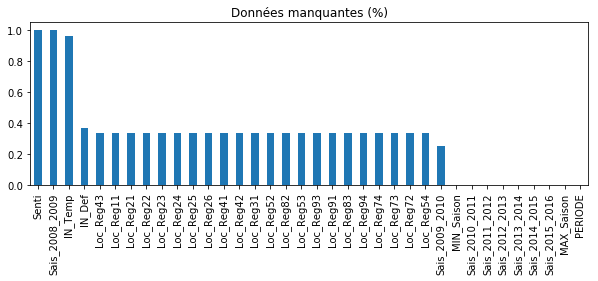

In [7]:
(allergies_regions.isnull().sum() / len(allergies_regions)).sort_values(ascending=False).plot(
    kind='bar',
    figsize=(10,3),
    title='Données manquantes (%)')

In [8]:
allergies_regions.shape

(365, 36)

## Nettoyage de la table

In [9]:
# Conversion au format date
allergies_regions.PERIODE = pd.to_datetime(allergies_regions.PERIODE, dayfirst=True, errors='coerce')
allergies_regions.dropna(subset=['PERIODE'], inplace=True)
# On remplace les ',' par des '.'
allergies_regions = allergies_regions.applymap(lambda x: x.replace(',', '.') if isinstance(x, str) else x)
# Conversion en numérique
for col in allergies_regions.columns:
    if col != 'PERIODE':
        allergies_regions[col] = pd.to_numeric(allergies_regions[col], errors='ignore')

In [10]:
# On met la période en index
allergies_regions.set_index('PERIODE', inplace=True)

In [11]:
sais_col = [x for x in allergies_regions.columns if x.startswith('Sais_') ]
reg_col = [x for x in allergies_regions.columns if x.startswith('Loc_') ]

In [12]:
allergies_regions.index.min()

Timestamp('2016-10-01 00:00:00')

### On récupère le nom des régions (ref=2015)



In [13]:
region_ref_2015 = pd.read_csv('../data/reg2015.txt', sep="\t", encoding='latin-1')
region_ref_2015.REGION = region_ref_2015.REGION.astype(str)
region_ref_2015.head(2)

,REGION,CHEFLIEU,TNCC,NCC,NCCENR
0,1,97105,3,GUADELOUPE,Guadeloupe
1,2,97209,3,MARTINIQUE,Martinique


In [14]:
regions_dict_2015 = region_ref_2015.set_index('REGION')['NCC'].to_dict()
reg_col_new = [regions_dict_2015[x[1]] for x in allergies_regions[reg_col].columns.str.split('Reg')]
reg_col_dict = dict(zip(reg_col, reg_col_new))
# On recomme les colonnes code_région par leur noms.
allergies_regions.rename(columns=reg_col_dict, inplace=True)

In [15]:
allergies_regions.head(2)

,Senti,Sais_2015_2016,Sais_2014_2015,Sais_2013_2014,Sais_2012_2013,Sais_2011_2012,Sais_2010_2011,Sais_2009_2010,Sais_2008_2009,ILE-DE-FRANCE,...,LIMOUSIN,RHONE-ALPES,AUVERGNE,LANGUEDOC-ROUSSILLON,PROVENCE-ALPES-COTE D'AZUR,CORSE,MIN_Saison,MAX_Saison,IN_Def,IN_Temp
PERIODE,,,,,,,,,,,,,,,,,,,,,
2016-10-01,NaN,97.4,97.6,97.1,96.8,99.6,92.7,NaN,NaN,101.18,...,101.87,103.65,100.44,99.670,96.29,100.780,92.7,99.6,99.2,NaN
2016-10-02,NaN,97.2,97.4,97.0,96.6,98.9,92.3,NaN,NaN,101.04,...,101.46,103.22,100.07,99.605,96.64,100.275,92.3,98.9,98.7,NaN


## Evolution des pathologie allergiques en France et par région

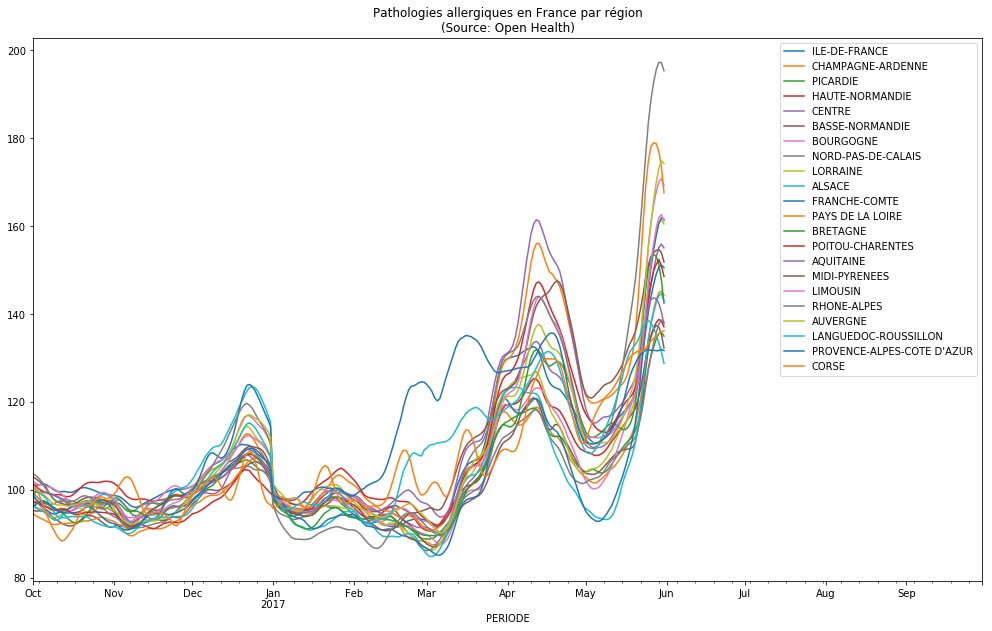

In [16]:
allergies_regions[reg_col_new].plot(figsize=(17, 10), title='Pathologies allergiques en France par région\n(Source: Open Health)')

On observer un énorme pic de pathologies allergiques entre les mois de Février et Avril 2017 en région PACA.

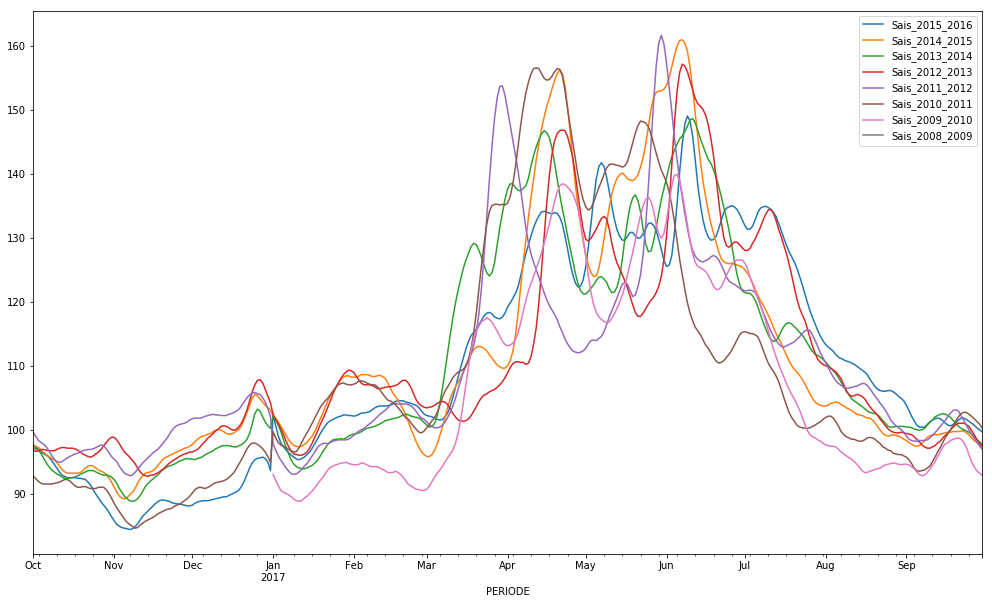

In [17]:
allergies_regions[sais_col].plot(figsize=(17, 10))

# Episodes de polution

Données de dépassements de seuils par polluant et par région.

http://www.lcsqa.org/indices-qualite-air/liste

In [18]:
episodes_pollution = pd.read_csv('../data/episodes_pollution.csv', sep=';')

In [19]:
episodes_pollution.head(4)

,Date de l'épisode,Origine,Polluant,Région,Département,Seuil dépassé
0,01/01/2017,CONSTAT,NO2,BRETAGNE,FINISTERE,200 µg/m³ / 1h
1,01/01/2017,CONSTAT,PM10,BRETAGNE,FINISTERE,50 µg/m³ / 24h
2,04/01/2017,CONSTAT,PM10,BRETAGNE,ILLE-ET-VILAINE,50 µg/m³ / 24h
3,04/01/2017,CONSTAT,PM10,GUYANE,GUYANE,80 µg/m³ / 24h


In [20]:
episodes_pollution.Polluant.value_counts() / len(episodes_pollution)

PM10    0.877850
O3      0.060261
NO2     0.035831
SO2     0.026059
Name: Polluant, dtype: float64

In [21]:
episodes_pollution['Seuil dépassé'].value_counts()

50 µg/m³ / 24h    427
80 µg/m³ / 24h    105
180 µg/m³ / 1h     36
200 µg/m³ / 1h     22
300 µg/m³ / 1h     16
Name: Seuil dépassé, dtype: int64

### Nettoyage de la table

In [22]:
episodes_pollution['Date de l\'épisode'] = pd.to_datetime(episodes_pollution['Date de l\'épisode'])
#episodes_pollution.set_index('Date de l\'épisode', inplace=True)

In [23]:
episodes_pollution['Seuil dépassé'] = [int(x.split(' µ')[0]) if isinstance(x, str) else x for x in episodes_pollution['Seuil dépassé']]

In [24]:
episodes_pollution.dropna(inplace=True)

### Création de la table : date x dépassement / polluant / région

In [25]:
polluant_by_regions = episodes_pollution.groupby('Région')['Date de l\'épisode', 'Seuil dépassé', 'Polluant'].apply(lambda x: x.to_dict('split')['data'])

In [26]:
polluant_by_regions.head()

Région
ALSACE             [[2017-01-20 00:00:00, 50.0, PM10], [2017-01-2...
AQUITAINE          [[2017-05-01 00:00:00, 50.0, PM10], [2016-10-1...
AUVERGNE           [[2016-12-16 00:00:00, 50.0, PM10], [2016-12-1...
BASSE-NORMANDIE    [[2016-12-27 00:00:00, 50.0, PM10], [2016-02-1...
BOURGOGNE          [[2016-10-12 00:00:00, 50.0, PM10], [2016-12-1...
dtype: object

In [27]:
date_index = pd.DataFrame(pd.date_range('2016-01', '2017-06-01'), columns=['date'])
date_index.head()

,date
0,2016-01-01
1,2016-01-02
2,2016-01-03
3,2016-01-04
4,2016-01-05


In [28]:
final_table = pd.DataFrame(pd.date_range('2016-10-01', '2017-06-01'), columns=['date'])
for pol in episodes_pollution.Polluant.unique():
    polluant_spe = episodes_pollution[episodes_pollution.Polluant == pol]
    polluant_by_regions = polluant_spe.groupby('Région')['Date de l\'épisode', 'Seuil dépassé'].apply(lambda x: x.to_dict('split')['data'])
    for region in polluant_by_regions.keys():
        region_df = pd.DataFrame(polluant_by_regions[region], columns=['date', region+'_'+pol])
        final_table = pd.merge(final_table, region_df, on='date', how='left').drop_duplicates(subset=['date', region+'_'+pol])

In [29]:
final_table.set_index('date', inplace=True)

In [30]:
final_table.head(2)

,BRETAGNE_NO2,ILE-DE-FRANCE_NO2,RHONE-ALPES_NO2,ALSACE_PM10,AQUITAINE_PM10,AUVERGNE_PM10,BASSE-NORMANDIE_PM10,BOURGOGNE_PM10,BRETAGNE_PM10,CENTRE_PM10,...,MIDI-PYRENEES_O3,NORD-PAS-DE-CALAIS_O3,RHONE-ALPES_O3,AQUITAINE_SO2,HAUTE-NORMANDIE_SO2,LA REUNION_SO2,NORD-PAS-DE-CALAIS_SO2,PAYS DE LA LOIRE_SO2,PROVENCE-ALPES-COTE D'AZUR_SO2,RHONE-ALPES_SO2
date,,,,,,,,,,,,,,,,,,,,,
2016-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# Liste des régions disponibles dans la table (les 26)
all_polluants_regions = set([col.split('_')[0] for col in final_table.columns.unique()])

# PLOT ALL REGIONS

In [32]:
allergies_regions.head(2)

,Senti,Sais_2015_2016,Sais_2014_2015,Sais_2013_2014,Sais_2012_2013,Sais_2011_2012,Sais_2010_2011,Sais_2009_2010,Sais_2008_2009,ILE-DE-FRANCE,...,LIMOUSIN,RHONE-ALPES,AUVERGNE,LANGUEDOC-ROUSSILLON,PROVENCE-ALPES-COTE D'AZUR,CORSE,MIN_Saison,MAX_Saison,IN_Def,IN_Temp
PERIODE,,,,,,,,,,,,,,,,,,,,,
2016-10-01,NaN,97.4,97.6,97.1,96.8,99.6,92.7,NaN,NaN,101.18,...,101.87,103.65,100.44,99.670,96.29,100.780,92.7,99.6,99.2,NaN
2016-10-02,NaN,97.2,97.4,97.0,96.6,98.9,92.3,NaN,NaN,101.04,...,101.46,103.22,100.07,99.605,96.64,100.275,92.3,98.9,98.7,NaN


In [33]:
final_table.columns       

Index(['BRETAGNE_NO2', 'ILE-DE-FRANCE_NO2', 'RHONE-ALPES_NO2', 'ALSACE_PM10',
       'AQUITAINE_PM10', 'AUVERGNE_PM10', 'BASSE-NORMANDIE_PM10',
       'BOURGOGNE_PM10', 'BRETAGNE_PM10', 'CENTRE_PM10',
       'CHAMPAGNE-ARDENNE_PM10', 'CORSE_PM10', 'FRANCHE-COMTE_PM10',
       'GUADELOUPE_PM10', 'GUYANE_PM10', 'HAUTE-NORMANDIE_PM10',
       'ILE-DE-FRANCE_PM10', 'LA REUNION_PM10', 'LANGUEDOC-ROUSSILLON_PM10',
       'LIMOUSIN_PM10', 'LORRAINE_PM10', 'MARTINIQUE_PM10',
       'MIDI-PYRENEES_PM10', 'NORD-PAS-DE-CALAIS_PM10',
       'PAYS DE LA LOIRE_PM10', 'PICARDIE_PM10', 'POITOU-CHARENTES_PM10',
       'PROVENCE-ALPES-COTE D'AZUR_PM10', 'RHONE-ALPES_PM10',
       'CHAMPAGNE-ARDENNE_O3', 'HAUTE-NORMANDIE_O3', 'ILE-DE-FRANCE_O3',
       'LANGUEDOC-ROUSSILLON_O3', 'MIDI-PYRENEES_O3', 'NORD-PAS-DE-CALAIS_O3',
       'RHONE-ALPES_O3', 'AQUITAINE_SO2', 'HAUTE-NORMANDIE_SO2',
       'LA REUNION_SO2', 'NORD-PAS-DE-CALAIS_SO2', 'PAYS DE LA LOIRE_SO2',
       'PROVENCE-ALPES-COTE D'AZUR_SO2', 'RH

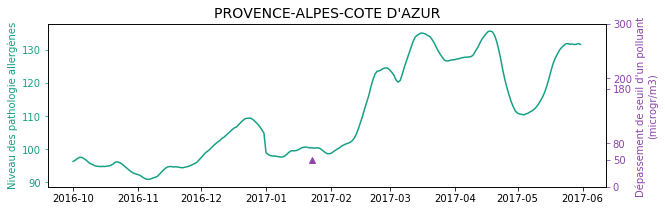

In [34]:
allergies_regions = allergies_regions.loc['2016-10-01':'2017-06-01']
s = final_table.index
plt.figure(figsize=(10,3))
col_PACA = [col for col in final_table.columns if col.startswith("PROVENCE-ALPES-COTE D'AZUR")]
ax_pol = plt.subplot()
ax_pol.plot(s, allergies_regions["PROVENCE-ALPES-COTE D'AZUR"], color='#16a085')
ax_pol.set_ylabel('Niveau des pathologie allergènes', color='#16a085', fontsize=10)
ax_pol.tick_params('y', colors='#16a085')
plt.title("PROVENCE-ALPES-COTE D'AZUR", fontsize=14)
ax_reg = ax_pol.twinx()
ax_reg.plot(s, final_table[col_PACA], '^', color='#8e44ad')
ax_reg.set_ylabel('Dépassement de seuil d\'un polluant \n(microgr/m3)', color='#8e44ad', fontsize=10)
ax_reg.tick_params('y', colors='#8e44ad')
ax_reg.set_yticks([0, 50, 80, 180, 200, 300])


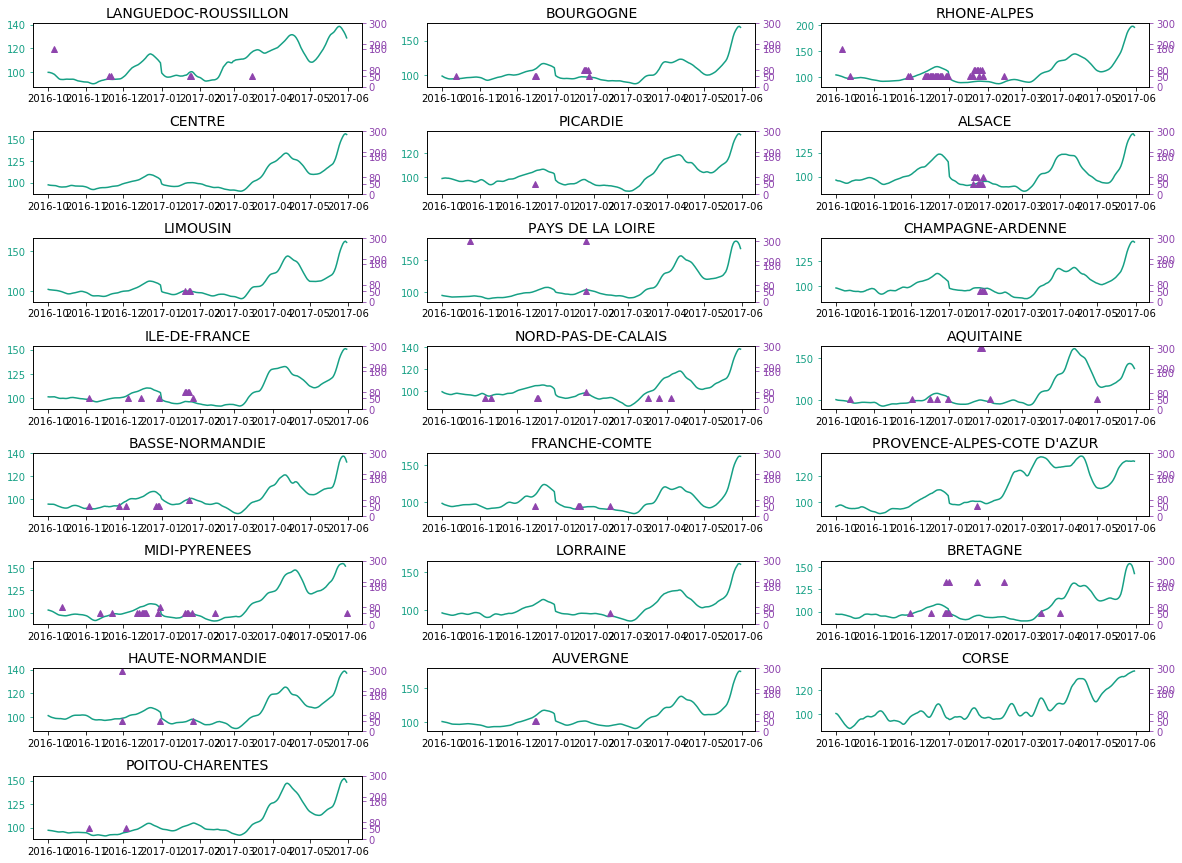

In [35]:
plt.figure(figsize=(20,15))
gs = gridspec.GridSpec(8, 3)
allergies_regions = allergies_regions.loc['2016-10-01':'2017-06-01']


n_pol = 0
for region in all_polluants_regions:
    
    col_pol_region = [col for col in final_table.columns if col.startswith(region)]
    s = final_table.index
    if (region in allergies_regions.columns):
        # Série temporelle des pathologies allergènes
        ax_pol = plt.subplot(gs[n_pol])
        ax_pol.plot(s, allergies_regions[region], color='#16a085')
        ax_pol.tick_params('y', colors='#16a085')
        plt.title(region, fontsize=14)
        ax_reg = ax_pol.twinx()
        ax_reg.plot(s, final_table[col_pol_region], '^', color='#8e44ad')
        ax_reg.tick_params('y', colors='#8e44ad')
        ax_reg.set_yticks([0, 50, 80, 180, 200, 300])
        n_pol += 1
        gs.update(hspace=0.7)
plt.show()



## Zoom sur l'Île de France

Données : airparif par polluant



In [36]:
# Monoxyde de carbone
CO = pd.read_csv('../data/20161001_20170601-CO_auto.csv', sep=';')
CO.head(2)

,date,heure,A1,PA04C,AUT,BASCH,AUB
0,NaN,NaN,microg/m3,microg/m3,microg/m3,microg/m3,microg/m3
1,01/10/2016,1.0,400,200,400,300,200


In [37]:
# Dioxyde d'azote
NO2 = pd.read_csv('../data/20161001_20170601-NO2_auto.csv', sep=';')
NO2.head(2)

,date,heure,ARG,EVRY,GEN,LOGNES,MELUN,VILLEM,PA15L,A1,...,ELYS,MONTG,NEUIL,PA12,BP_EST,AUB,EIFF3,IVRY,PA07,TREMB
0,NaN,NaN,microg/m3,microg/m3,microg/m3,microg/m3,microg/m3,microg/m3,microg/m3,microg/m3,...,microg/m3,microg/m3,microg/m3,microg/m3,microg/m3,microg/m3,microg/m3,microg/m3,microg/m3,microg/m3
1,01/10/2016,1.0,42,20,54,17,9,35,n/d,70,...,n/d,21,51,39,69,46,30,32,39,28


In [38]:
# Poussières < 2.5
PM25 = pd.read_csv('../data/20161001_20170601-PM25_auto.csv', sep=';')
PM25.head(2)

,date,heure,GEN,GON,A1,RUR-SE,RN6,RAMBO,RUR_S,BOB,PA04C,VITRY,AUT,RUR_N,BP_EST
0,NaN,NaN,microg/m3,microg/m3,microg/m3,microg/m3,microg/m3,ug/m3,microg/m3,microg/m3,microg/m3,microg/m3,microg/m3,microg/m3,microg/m3
1,01/10/2016,1.0,11,7,7,5,4,8,n/d,7,9,7,14,5,11


In [39]:
# Poussières < 10
PM10 = pd.read_csv('../data/20161001_20170601-PM10_auto.csv', sep=';')
PM10.head(2)

,date,heure,GEN,LOGNES,AUT,PA15L,CERGY,NOGENT,A1,RN2,...,PA04C,RUR_S,RN6,HAUS,VITRY,RD934,BASCH,ELYS,BP_EST,TREMB
0,NaN,NaN,microg/m3,microg/m3,ug/m3,ug/m3,microg/m3,microg/m3,microg/m3,ug/m3,...,microg/m3,ug/m3,microg/m3,microg/m3,microg/m3,microg/m3,microg/m3,microg/m3,microg/m3,microg/m3
1,01/10/2016,1.0,14,14,29,n/d,10,10,24,15,...,16,n/d,8,21,12,8,23,14,24,13


In [40]:
# Ozone
O3 = pd.read_csv('../data/20161001_20170601-O3_auto.csv', sep=';')
O3.head(2)

,date,heure,LOGNES,MELUN,VILLEM,CACH,CERGY,PA13,RUR-E,RUR-NO,...,PA04C,RUR-SO,VITRY,MONTG,NEUIL,RUR-NE,RAMBO,EIFF3,RUR_N,TREMB
0,NaN,NaN,microg/m3,microg/m3,microg/m3,microg/m3,microg/m3,microg/m3,microg/m3,microg/m3,...,microg/m3,microg/m3,microg/m3,microg/m3,microg/m3,microg/m3,microg/m3,microg/m3,microg/m3,microg/m3
1,01/10/2016,1.0,19,25,11,7,20,12,36,20,...,13,n/d,n/d,9,n/d,28,28,24,12,8


In [41]:
# Dioxyde de souffre
SO2 = pd.read_csv('../data/20161001_20170601-SO2_auto.csv', sep=';')
SO2.head(2)

,date,heure,RUR-SE,AUT,VITRY,NEUIL,AUB,EIFF3
0,NaN,NaN,microg/m3,microg/m3,microg/m3,microg/m3,microg/m3,microg/m3
1,01/10/2016,1.0,1,0,1,0,0,0


In [42]:
# Oxyde d'azote
NOX = pd.read_csv('../data/20161001_20170601-NOX_auto.csv', sep=';')
len(NOX)

5857

In [43]:
def clean_aggregate_polluant(df):
    df_clean = df.copy()
    # On enlève les unités de mesure 'microg/m3'
    df_clean = df_clean.iloc[1:]
    df_clean = df_clean.replace('n/d', np.nan)
    # Conversion de la date au bon format.
    df_clean.date = pd.to_datetime(df_clean.date, format='%d/%m/%Y')
    # Conversion en numérique
    for col in df_clean.columns[2:]:
        df_clean[col] = pd.to_numeric(df_clean[col])
    # Moyenne journalière.
    df_clean = df_clean.groupby('date')[df_clean.columns[2:]].mean()
    # Moyenne de toutes les stations.
    df_clean = df_clean.mean(axis=1)

    return df_clean.reset_index()

In [44]:
NOX = pd.read_csv('../data/20161001_20170601-NOX_auto.csv', sep=';')
NOX = clean_aggregate_polluant(NOX)
NOX.head(2)

,date,0
0,2016-10-01,72.061937
1,2016-10-02,60.377252


In [45]:
IDF_polluants = pd.DataFrame(pd.date_range('2016-10-01', '2017-06-01'), columns=['date'])
for pol in ['CO', 'NO2', 'PM25', 'PM10', 'O3', 'SO2', 'NOX']:
    polluant = pd.read_csv('../data/20161001_20170601-%s_auto.csv' % pol, sep=';')
    polluant_clean = clean_aggregate_polluant(polluant)
    polluant_clean.columns = ['date', pol]
    print('%s: %s lignes' % (pol, len(polluant_clean)))
    print('%s: OK' % pol)
    IDF_polluants = pd.merge(IDF_polluants, polluant_clean, on='date', how='left')

CO: 244 lignes
CO: OK
NO2: 244 lignes
NO2: OK
PM25: 244 lignes
PM25: OK
PM10: 244 lignes
PM10: OK
O3: 244 lignes
O3: OK
SO2: 244 lignes
SO2: OK
NOX: 244 lignes
NOX: OK


In [46]:
IDF_polluants.set_index('date', inplace=True)

In [47]:
name_polluants = {
    'CO' : 'Dioxyde de carbone',
    'NO2': 'Dioxyde d\'azote',
    'PM25': 'Particules < 2.5um3',
    'PM10': 'Particules < 10um3',
    'O3': 'Ozone',
    'SO2': 'Dioxyde de souffre',
    'NOX': 'Oxyde d\'azote'
}

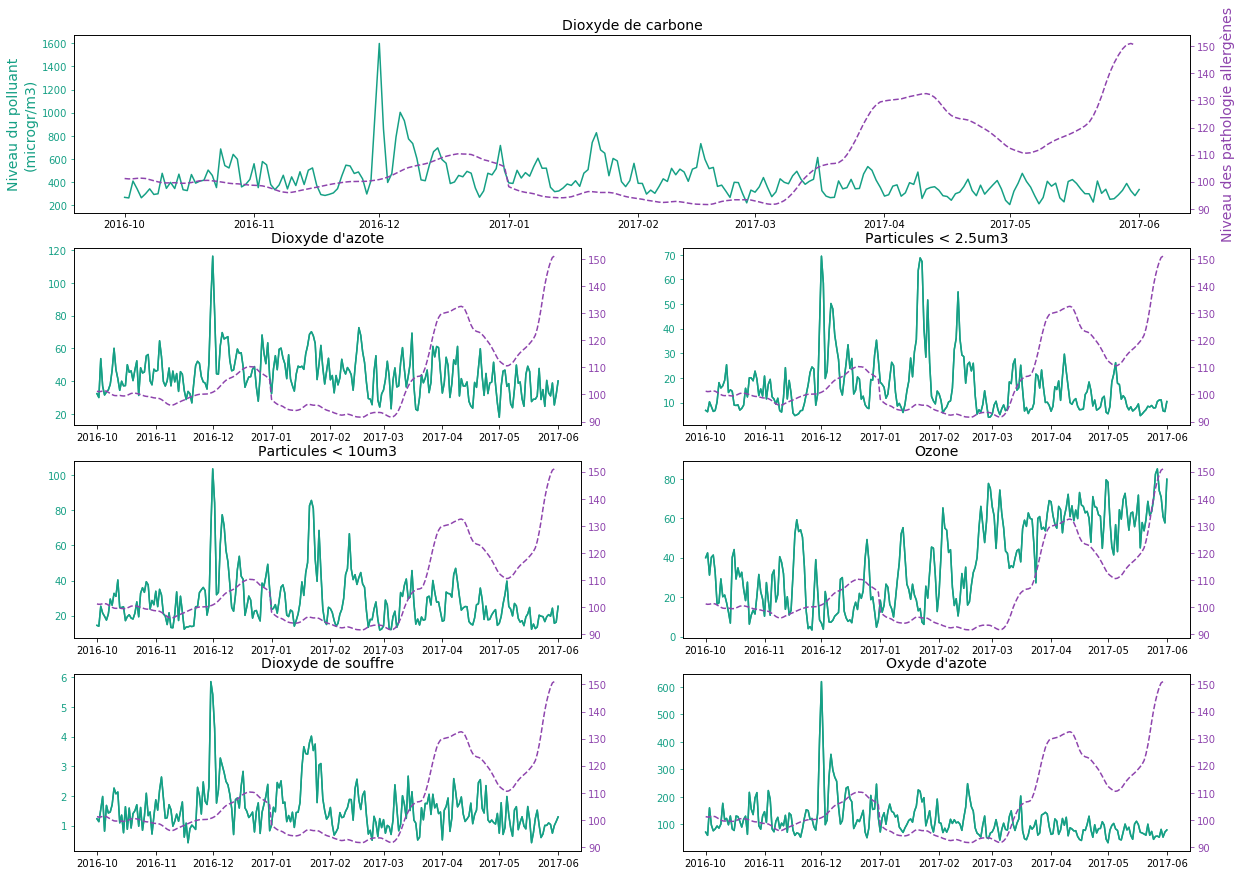

In [48]:
plt.figure(figsize=(20,15))
gs = gridspec.GridSpec(4, 2)
allergies_regions = allergies_regions.loc['2016-10-01':'2017-06-01']
s = allergies_regions.index


n_pol = 0
for pol in IDF_polluants.columns:
    if (n_pol == 0):    
        ax_pol = plt.subplot(gs[0, :])
        n_pol += 1
    else:
        ax_pol = plt.subplot(gs[n_pol])
    ax_pol.plot(s, IDF_polluants[pol], color='#16a085')
    if (n_pol - 1 == 0):
        ax_pol.set_ylabel('Niveau du polluant\n(microgr/m3)', color='#16a085', fontsize=14)
    else:
        ax_pol.plot(s, IDF_polluants[pol], color='#16a085')
    ax_pol.tick_params('y', colors='#16a085')
    plt.title(name_polluants[pol], fontsize=14)
    
    ax_reg = ax_pol.twinx()
    ax_reg.plot(s, allergies_regions['ILE-DE-FRANCE'], '--', color='#8e44ad')
    if (n_pol - 1 == 0):
        ax_reg.set_ylabel('Niveau des pathologie allergènes', color='#8e44ad', fontsize=14)
    ax_reg.tick_params('y', colors='#8e44ad')
    n_pol += 1
plt.show()



Calculer la corrélation pour chaque polluant avec la série, puis plotter le polluant le plus corrélé avec le niveau de pathologie allergique.

In [49]:
IDF_polluants.corrwith(allergies_regions['ILE-DE-FRANCE'])

CO     -0.258490
NO2    -0.217785
PM25   -0.205211
PM10   -0.146558
O3      0.558341
SO2    -0.158846
NOX    -0.227293
dtype: float64

In [50]:
IDF_polluants['O3'].corr(allergies_regions['ILE-DE-FRANCE'])

0.55834055354239354

In [51]:
df = pd.concat([IDF_polluants['O3'], allergies_regions['ILE-DE-FRANCE']], axis=1)
df.head()

,O3,ILE-DE-FRANCE
2016-10-01,39.990942,101.18
2016-10-02,42.411547,101.04
2016-10-03,31.141541,101.09
2016-10-04,40.219203,101.25
2016-10-05,41.320652,101.30


In [52]:
df.corr()

,O3,ILE-DE-FRANCE
O3,1.000000,0.558341
ILE-DE-FRANCE,0.558341,1.000000


L'ozone et les pathologies allergique d'IDF sont très corélées (0.55) au jour-le-jour.

Regardons ce qu'il se passe lorsque 

## Cross-correlation

Regardons les corrélations entre O3(t-n) et les pathilogie allergènes en t. N = 1..10


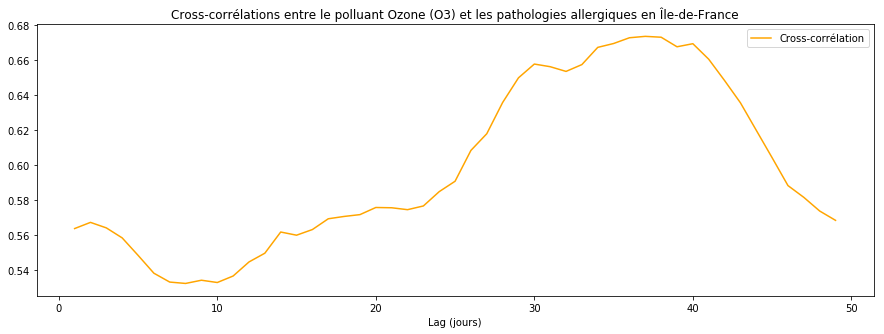

In [53]:
fig = plt.figure(figsize=(15,5))
l_cross_corr = []
l_lags = range(1, 50)
for lag in l_lags:
    l_cross_corr.append(df['ILE-DE-FRANCE'].corr(df['O3'].shift(lag)))

plt.plot(l_lags, l_cross_corr, color='orange', label='Cross-corrélation')
plt.legend(loc='best')
plt.xlabel('Lag (jours)')
plt.title('Cross-corrélations entre le polluant Ozone (O3) et les pathologies allergiques en Île-de-France')

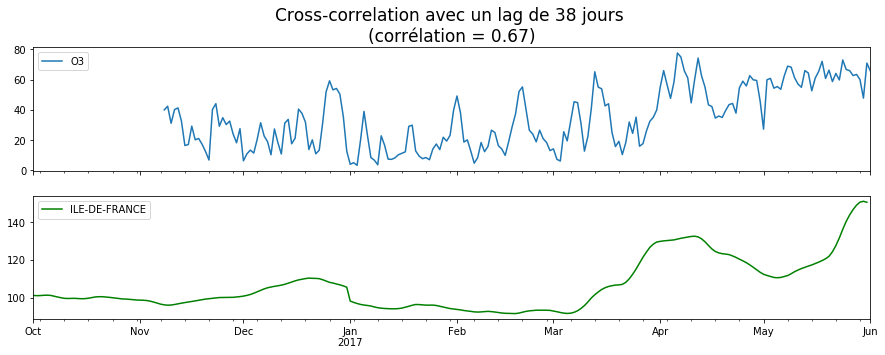

In [54]:
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot(211)
plt.title('Cross-correlation avec un lag de 38 jours \n(corrélation = 0.67)', fontsize=17)
df['O3'].shift(38).plot(ax=ax1, label='O3')
plt.legend(loc='upper left')
ax2 = plt.subplot(212)
df['ILE-DE-FRANCE'].plot(color='green', sharex=ax1, label='ILE-DE-FRANCE')
plt.legend(loc='upper left')

## Rolling-correlation

Regardons les corrélations entre mean(O3(t, t-w)) et les pathilogie allergènes en t. w = 1..30


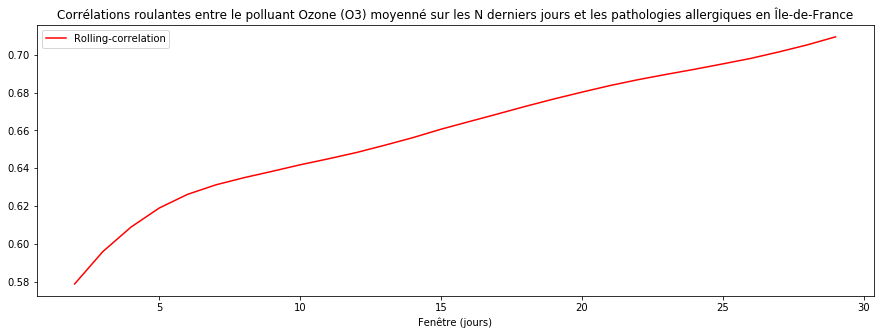

In [55]:
fig = plt.figure(figsize=(15,5))

l_windows = range(2, 30)
l_rolling_corr = []
for w in l_windows:
    O3_mean_last_ndays = df['O3'].rolling(w).mean()
    l_rolling_corr.append(O3_mean_last_ndays.corr(df['ILE-DE-FRANCE']))

plt.plot(l_windows, l_rolling_corr, color='red', label='Rolling-correlation')
plt.legend(loc='best')
plt.xlabel('Fenêtre (jours)')
plt.title('Corrélations roulantes entre le polluant Ozone (O3) moyenné sur les N derniers jours et les pathologies allergiques en Île-de-France')

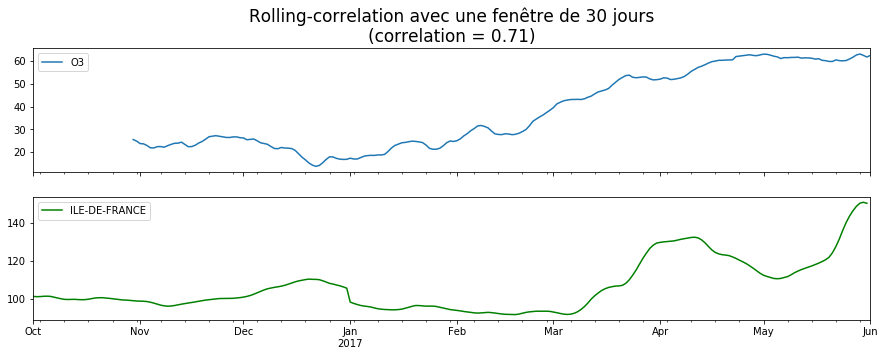

In [56]:
fig = plt.figure(figsize=(15,5))

df['O3_lean_last_30d'] = df['O3'].rolling(30).mean()
corr = df['O3_lean_last_30d'].corr(df['ILE-DE-FRANCE'])
ax1 = plt.subplot(211)
plt.title('Rolling-correlation avec une fenêtre de 30 jours\n(correlation = %.2f)' % corr, fontsize=17)
df['O3_lean_last_30d'].plot(ax=ax1, label='O3')
plt.legend(loc='upper left')
ax2 = plt.subplot(212)
df['ILE-DE-FRANCE'].plot(color='green', sharex=ax1, label='ILE-DE-FRANCE')
plt.legend(loc='upper left')

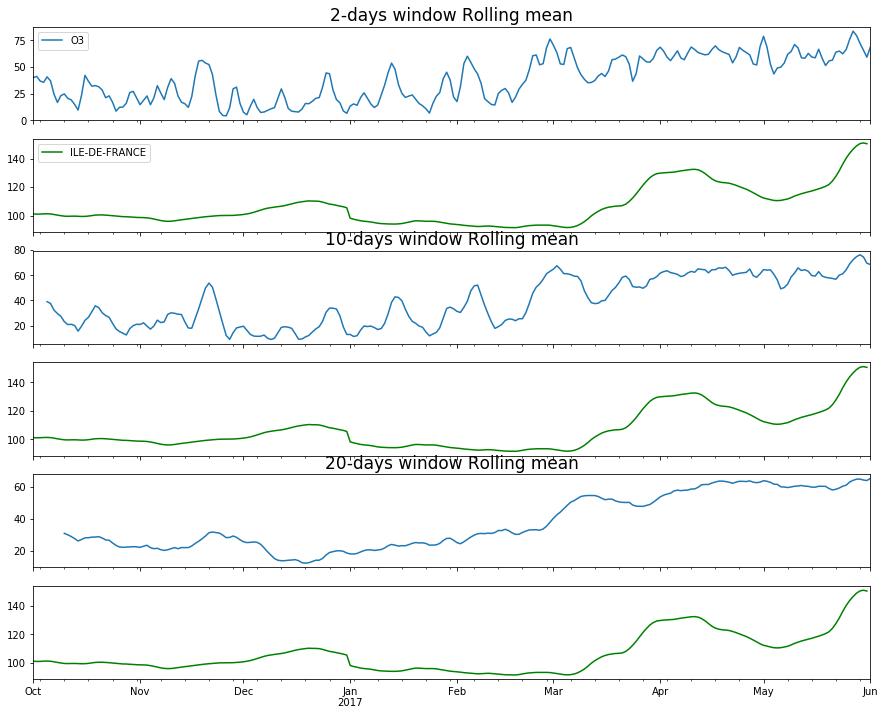

In [57]:
#pd.rolling_var(df, 5).plot(figsize=(20, 10))
f = plt.figure(figsize=(15, 12))

ax1 = plt.subplot(611)
plt.title('2-days window Rolling mean', fontsize=17)
df['O3'].rolling(2, min_periods=1).mean().plot(ax=ax1, label='O3')
plt.legend(loc='upper left')
ax2 = plt.subplot(612)
df['ILE-DE-FRANCE'].plot(color='green', sharex=ax1, label='ILE-DE-FRANCE')
plt.legend(loc='upper left')

ax3 = plt.subplot(613)
plt.title('10-days window Rolling mean', fontsize=17)
df['O3'].rolling(window=5, min_periods=5).mean().plot(ax=ax3)
ax4 = plt.subplot(614)
df['ILE-DE-FRANCE'].plot(color='green', sharex=ax3)


ax5 = plt.subplot(615)
plt.title('20-days window Rolling mean', fontsize=17)
df['O3'].rolling(window=20, min_periods=10).mean().plot(ax=ax5)
ax6 = plt.subplot(616)
df['ILE-DE-FRANCE'].plot(color='green', sharex=ax5)


plt.show()